<a href="https://colab.research.google.com/github/itwipsy/-/blob/main/N421a_Count_based_Representation_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [420]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [563]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [564]:
df.head()

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...


In [565]:
del df['Unnamed: 0'],df['url']

### 1) 토큰을 정제합니다.

In [566]:
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [567]:
df_duplicated_info = df.duplicated()
print(df_duplicated_info)
print(type(df_duplicated_info))

0       False
1        True
2       False
3        True
4       False
        ...  
1295    False
1296     True
1297    False
1298     True
1299    False
Length: 1300, dtype: bool
<class 'pandas.core.series.Series'>


In [568]:
df=df.drop_duplicates()

In [569]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...


In [544]:
# df['description'] = df['description'].str.replace('\n'," ")

In [571]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...


- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [572]:
df = df.applymap(str.lower)

In [548]:
import re
regex = r"[^a-z0-9\n ]"

# 정규식을 적용할 스트링
test_str = ("(Natural Language Pro\ncessing)@#4324@#$@342 is easy!, AI!\n")

# 치환할 문자
subst = ""

result = re.sub(regex, subst, test_str)
result

'atural anguage ro\ncessing4324342 is easy \n'

In [549]:
def tokenize(text):
    """text 문자열을 의미있는 단어 단위로 list에 저장합니다.
    Args:
        text (str): 토큰화 할 문자열
    Returns:
        list: 토큰이 저장된 리스트
    """
    # 정규식 적용
    tokens = re.sub(regex, subst, text)


    
    return tokens

In [552]:
df['title']= df['title'].apply(tokenize)
df['company']= df['company'].apply(tokenize)
df['description']= df['description'].apply(tokenize)


In [553]:
df

,title,company,description
0,data scientist structured products,equitrust life insurance company,job details\ndescription\nessential duties and...
2,specialist data science,nationwide,as a team member in the finance and internal a...
4,sr data scientist remote,american credit acceptance,overview\namerican credit acceptance seeks a h...
5,data scientist associate sr dads06 btb legacy...,jpmorgan chase bank na,jp morgans corporate investment bank cib is a...
6,data scientist,vystar credit union,at vystar we offer competitive pay an excellen...
...,...,...,...
1288,senior data analyst,intuit,our expert delivery business intelligence tea...
1294,senior data scientist advertising business,spotify,music for everyone no credit card needed its a...
1295,senior data applied scientist,microsoft,senior data applied scientist\ndo you have a ...
1297,senior data scientist,ebay inc,ebay is a global commerce leader that allows y...


In [573]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [596]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    doc_tokens = list(filter(None, doc_tokens))
    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].tail()

1288    [our, expert, delivery, business, intelligence...
1294    [music, for, everyone, no, credit, card, neede...
1295    [senior, data, applied, scientist, do, you, ha...
1297    [ebay, is, a, global, commerce, leader, that, ...
1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, dtype: object

In [597]:
df['tokens']

0       [job, details, description, essential, duties,...
2       [as, a, team, member, in, the, finance, and, i...
4       [overview, american, credit, acceptance, seeks...
5       [jp, morgans, corporate, investment, bank, cib...
6       [at, vystar, we, offer, competitive, pay, an, ...
                              ...                        
1288    [our, expert, delivery, business, intelligence...
1294    [music, for, everyone, no, credit, card, neede...
1295    [senior, data, applied, scientist, do, you, ha...
1297    [ebay, is, a, global, commerce, leader, that, ...
1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, Length: 757, dtype: object

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [576]:
### 이곳에서 과제를 진행해 주세요 ### 
from collections import Counter

# Counter 객체는 리스트요소의 값과 요소의 갯수를 카운트 하여 저장하고 있습니다.
# 카운터 객체는 .update 메소드로 계속 업데이트 가능합니다.
word_counts = Counter()

# 토큰화된 각 리뷰 리스트를 카운터 객체에 업데이트 합니다. 
df['tokens'].apply(lambda x: word_counts.update(x))

# 가장 많이 존재하는 단어 순으로 10개를 나열합니다
word_counts.most_common(10)

[('and', 21864),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 ('or', 3812)]

In [577]:
word_counts.most_common(10)

[('and', 21864),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 ('or', 3812)]

In [578]:
top10=pd.DataFrame(word_counts.most_common(10))

In [579]:
top10

,0,1
0,and,21864
1,to,12694
2,the,10538
3,of,8839
4,data,7425
5,in,6769
6,a,6436
7,with,5727
8,for,4132
9,or,3812


In [580]:
def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [581]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
113,and,755,21864,1.0,0.056456,0.056456,0.997358
39,to,754,12694,2.0,0.032778,0.089233,0.996037
47,the,745,10538,3.0,0.027210,0.116444,0.984148
9,of,745,8839,4.0,0.022823,0.139267,0.984148
5,data,740,7425,5.0,0.019172,0.158440,0.977543
159,in,748,6769,6.0,0.017478,0.175918,0.988111
54,a,739,6436,7.0,0.016619,0.192537,0.976222
12,with,742,5727,8.0,0.014788,0.207324,0.980185
382,for,727,4132,9.0,0.010669,0.217994,0.960370
141,or,708,3812,10.0,0.009843,0.227837,0.935271


# ▽누적분포 그래프

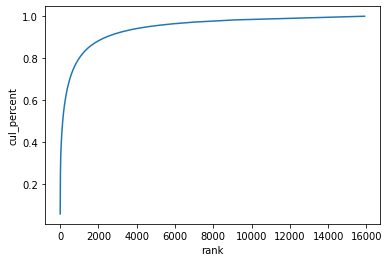

In [582]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [611]:
STOP_WORDS = nlp.Defaults.stop_words.union(["data", "work","\n","\n\n"])

△불용어 사전에 "data","work"추가

In [612]:
df['tokens']

0       [job, details, description, essential, duties,...
2       [team, member, finance, internal, audit, depar...
4       [overview:, american, credit, acceptance, seek...
5       [j.p., morgan's, corporate, &, investment, ban...
6       [vystar,, offer, competitive, pay,, excellent,...
                              ...                        
1288    [expert, delivery, &, business, intelligence, ...
1294    [music, everyone,, credit, card, needed., it’s...
1295    [senior, &, applied, scientist, passion, machi...
1297    [ebay, global, commerce, leader, allows, shape...
1299    [tl;dr, spring, accelerating, discovery, thera...
Name: tokens, Length: 757, dtype: object

In [613]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    
    doc_tokens = []

    for token in doc: 
        
        if token.text.lower() not in STOP_WORDS:
 
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [614]:
wc0 = word_count(df['tokens'])
wc0.head(12)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
38,experience,687,3055,1.0,0.012447,0.012447,0.907530
631,business,518,1885,2.0,0.007680,0.020128,0.684280
96,team,548,1323,3.0,0.005390,0.025518,0.723910
471,learning,467,1193,4.0,0.004861,0.030379,0.616909
568,machine,468,1140,5.0,0.004645,0.035024,0.618230
725,science,460,1048,6.0,0.004270,0.039294,0.607662
219,ability,452,958,7.0,0.003903,0.043197,0.597094
37,analysis,436,896,8.0,0.003651,0.046848,0.575958
627,statistical,409,890,9.0,0.003626,0.050474,0.540291
200,skills,466,886,10.0,0.003610,0.054084,0.615588


In [615]:
df['tokens']

0       [job, details, description, essential, duties,...
2       [team, member, finance, internal, audit, depar...
4       [overview:, american, credit, acceptance, seek...
5       [j.p., morgan's, corporate, &, investment, ban...
6       [vystar,, offer, competitive, pay,, excellent,...
                              ...                        
1288    [expert, delivery, &, business, intelligence, ...
1294    [music, everyone,, credit, card, needed., it’s...
1295    [senior, &, applied, scientist, passion, machi...
1297    [ebay, global, commerce, leader, allows, shape...
1299    [tl;dr, spring, accelerating, discovery, thera...
Name: tokens, Length: 757, dtype: object

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [618]:
# Lemmatization 과정을 함수로 만들어 봅시다
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [619]:
### 이곳에서 과제를 진행해 주세요 ### 

df['lemmas'] = df['description'].apply(get_lemmas)
df['lemmas'].head()

0    [job, detail, description, essential, duty, re...
2    [team, member, finance, internal, audit, depar...
4    [overview, american, credit, acceptance, seek,...
5    [j.p, morgan, corporate, investment, bank, cib...
6    [vystar, offer, competitive, pay, excellent, b...
Name: lemmas, dtype: object

In [620]:
wc1 = word_count(df['lemmas'])
wc1.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
34,experience,710,3666,1.0,0.014929,0.014929,0.937913
74,team,637,2336,2.0,0.009513,0.024441,0.841480
485,business,545,2193,3.0,0.008930,0.033372,0.719947
78,science,619,1736,4.0,0.007069,0.040441,0.817701
33,analysis,544,1609,5.0,0.006552,0.046993,0.718626
183,model,528,1476,6.0,0.006011,0.053004,0.697490
219,analytic,460,1409,7.0,0.005738,0.058742,0.607662
42,skill,560,1333,8.0,0.005428,0.064170,0.739762
374,learning,489,1318,9.0,0.005367,0.069537,0.645971
162,product,449,1305,10.0,0.005314,0.074852,0.593131


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [621]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [622]:
### 이곳에서 과제를 진행해 주세요 ### 
# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [623]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [624]:
tfidf_tuned = TfidfVectorizer(stop_words='english'
                        ,tokenizer=tokenize
                        ,ngram_range=(1,2)
                        ,max_df=.7
                        ,min_df=3
                       )

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['description'])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

,aa,aa employer,aa m,ab,ab testing,abide,abilitie,abilitie problem,ability,ability ability,ability accurately,ability achieve,ability adapt,ability adjust,ability analyze,ability apply,ability articulate,ability autonomously,ability break,ability breakdown,ability build,ability business,ability clearly,ability collaborate,ability collaborative,ability collaboratively,ability collect,ability communicate,ability competency,ability complex,ability comprehend,ability conduct,ability contribute,ability convey,ability create,ability deal,ability decision,ability deliver,ability demonstrate,ability deploy,...,year machine,year post,year practical,year present,year principle,year prior,year probationary,year professional,year progressively,year prove,year python,year real,year recent,year relate,year related,year relevant,year research,year science,year scientist,year specialized,year sql,year statistical,year team,year time,year work,year year,yes,yes time,yield,york,york city,york london,york ny,york times,youtube,yrs,zero,zillow,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055805,0.0,0.0,0.0,0.070575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053169,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052673,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053425,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038364,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.047488,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.029813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033918,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.026358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016449,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [625]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용히 NN 모델을 학습시킵니다. (디폴트)최근접 5 이웃.
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_tuned)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [626]:
nn.kneighbors([dtm_tfidf_tuned.iloc[88]])

(array([[0.        , 1.20336986, 1.30421265, 1.30991979, 1.31237551]]),
 array([[ 88,  40, 121,  68, 178]]))

In [627]:
df['description'].iloc[88]

'as a data engineer, you will build a solid data foundation that powers the entire spectrum from business intelligence to artificial intelligence. you’ll be critical to helping us in our transition from batch to real-time, one-to-one to many-to-many connections, centrally managed infrastructure to self-service tools that allow easy experimentation, and from manual to automated processes.\n\nthis role will work closely with the data science and ai team and will focus on the enablement and acceleration of new and existing workflows. we need someone who will bring a thoughtful perspective, empathy, creativity, and a positive attitude to solve problems at scale. this role is ideal for someone looking to extend software engineering skills into the field of machine learning and artificial intelligence.\n\nresponsibilities: establish scalable, efficient, automated processes for data analyses, model development, validation and implementation work closely with data scientists and analysts to cr